<a href="https://colab.research.google.com/github/diego2017003/clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática de Clustering
---


In [56]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
dados = pd.read_csv('https://raw.githubusercontent.com/diego2017003/clustering/main/Movie_Dataset.csv')
dados.head()

,country_release,language,filming_location,year_release,director_gender,director_country,director_year_birth,company_city,founded,company_type,actor_education,actor_gender,actor_nationality,roletype,actor_year_birth
0,BRAZIL,BILINGUAL,CHINA,0.961,M,ENGLAND,0.894,BURBANK,0.061,FILM_PRODUCTION,COMP-SCNDRY,MALE,WELSH,DETECTIVE,0.775
1,BRAZIL,BILINGUAL,CHINA,0.961,M,ENGLAND,0.894,BURBANK,0.061,FILM_PRODUCTION,INCOMP-SCNDRY,MALE,AUSTRALIAN,COWBOY,0.817
2,USA,ENGLISH,MOROCCO,0.855,M,ENGLAND,0.543,BURBANK,0.828,FILM_PRODUCTION,COMP-SCNDRY,MALE,NEW_ZEALANDER,HERO,0.692
3,USA,ENGLISH,MOROCCO,0.855,M,ENGLAND,0.543,BURBANK,0.828,FILM_PRODUCTION,COMP-SCNDRY,MALE,PUERTO_RICAN,VILLAIN,0.775
4,BAHRAIN,BILINGUAL,ENGLAND,0.974,M,ENGLAND,0.872,BURBANK,0.061,FILM_PRODUCTION,COMP-SCNDRY,MALE,AMERICAN,HERO,0.700


## Primeiro será feita a binarização de todas as variáveis categóricas para que os algoritmos de clustering lidem somente com variáveis numéricas para realizar o agrupamento.

In [57]:
#alocando todas as colunas não numéricas
dados2 = dados.loc[:,['country_release', 'language', 'filming_location', 
       'director_gender', 'director_country', 
       'company_city', 'company_type', 'actor_education',
       'actor_gender', 'actor_nationality', 'roletype']]
#binarizando todas as variáveis categóricas
dados2 = pd.get_dummies(data=dados2,columns=['country_release', 'language', 'filming_location', 
       'director_gender', 'director_country', 
       'company_city', 'company_type', 'actor_education',
       'actor_gender', 'actor_nationality', 'roletype'])
#Unindo as vaiáveis numéricas ao novo dataset
dados2['year_release'] = dados['year_release']
dados2['director_year_birth'] = dados['director_year_birth']
dados2['founded'] = dados['founded'] 
dados2['actor_year_birth'] = dados['actor_year_birth']


### 1. Kmeans
---

[3.5219091103983486, 3.2254731875722187, 3.168934284293572, 3.088818025752424, 2.976785587533055, 2.983789695515985, 2.9420820214276233, 2.937020132307408, 2.8681339324990285, 2.839434997686286, 2.786874209211357, 2.8646448939924287, 2.7727200533503082, 2.8351749535633517, 2.8276569787744483, 2.6683803193232376, 2.655539560480281, 2.72783518166362, 2.7313939336455673]


Text(0.5, 1.0, 'Silhouette')

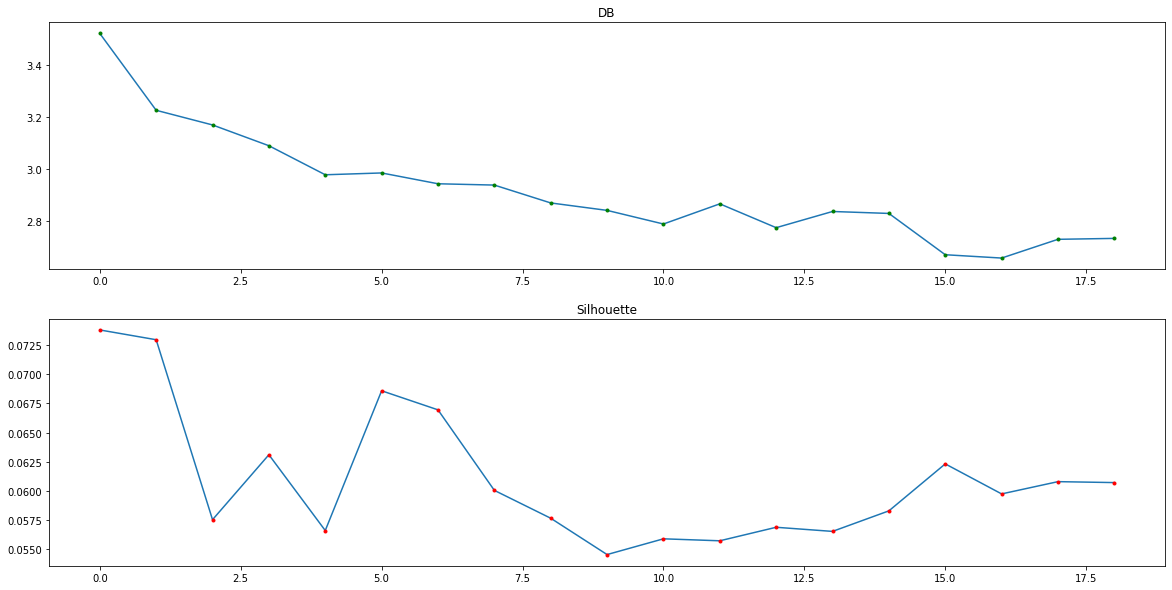

In [67]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np

ldb = []
ls = []
for i in range(2,21,1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(dados2)
  labels =kmeans.labels_
  ldb.append(davies_bouldin_score(dados2, labels))
  ls.append(silhouette_score(dados2, labels))
print(la)

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(ldb)
plt.plot(ldb,'g.')
plt.title("DB")
plt.subplot(2,1,2)
plt.plot(ls)
plt.plot(ls,'r.')
plt.title("Silhouette")

Utilizando o método do cotovelo para o kmeans nós observamos uma mudança de "curvatura" próximo ao número 5 do gráfico, isso significa que para esse dataset o número ideal de clusters seria 7(o 0 do gráfico é o número 2 de clusters, o 1 é o número de 3 clusters e assim por diante). já analisando os indices de silhouette, observamos que os 3 maiores valores são 2,3 e 7. Seria escolhido portanto o número 7 para o k ideal devido a concordância entre os dois métodos. 


### 2. Clustering Hierárquico
---
Para o clustering hierárquico foi utilizada a função de clustering aglomerativo do scikit-learn que utiliza os métodos hierárquicos.  

[3.5219091103983486, 3.2254731875722187, 3.168934284293572, 3.088818025752424, 2.976785587533055, 2.983789695515985, 2.9420820214276233, 2.937020132307408, 2.8681339324990285, 2.839434997686286, 2.786874209211357, 2.8646448939924287, 2.7727200533503082, 2.8351749535633517, 2.8276569787744483, 2.6683803193232376, 2.655539560480281, 2.72783518166362, 2.7313939336455673]


Text(0.5, 1.0, 'Silhouette')

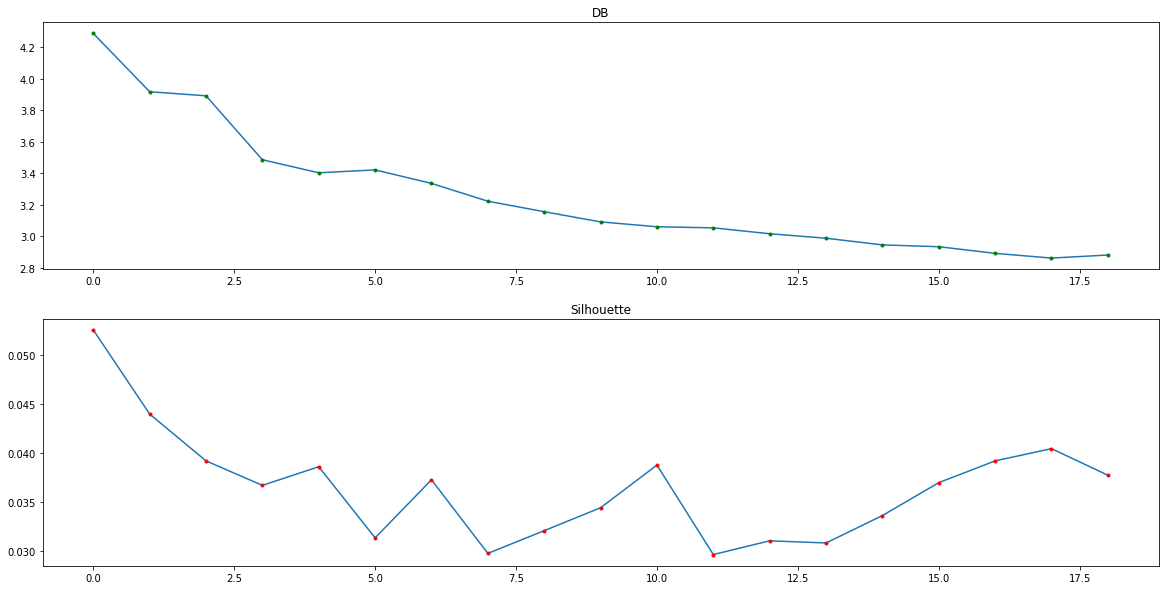

In [68]:
from sklearn.cluster import AgglomerativeClustering

ls = []
ldb = []
for i in range(2,21,1):
  HieClust = AgglomerativeClustering(n_clusters=i)
  HieClust.fit(dados2)
  labels = HieClust.labels_
  ldb.append(davies_bouldin_score(dados2, labels))
  ls.append(silhouette_score(dados2, labels))
print(la)
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(ldb)
plt.plot(ldb,'g.')
plt.title("DB")
plt.subplot(2,1,2)
plt.plot(ls)
plt.plot(ls,'r.')
plt.title("Silhouette")

Para o clustering hierárquico o comportamento foi ligeiramente diferente do encontrado no kmeans. Pelo método do cotovelo encontramos uma mudança de concavidade do gráfico aproximadamente entre o valores de 4 e 5(k igual a 6 e 7). já os k's com maior silhouette são o 2,3,6,19. Dessa forma, seria escolhido o valor de 6 como número adequado de clusters já que o valor se encontra nos dois índices. 

### 3. Expectation Maximization
---
Essa parte da prática foi realizada com o GaussianMixture do scikit-learn. Ao contrário das demais implementações foi utilizada a predição para extrair as labels resultantes do clustering invés do parâmetro **label_** 

[3.5219091103983486, 3.2254731875722187, 3.168934284293572, 3.088818025752424, 2.976785587533055, 2.983789695515985, 2.9420820214276233, 2.937020132307408, 2.8681339324990285, 2.839434997686286, 2.786874209211357, 2.8646448939924287, 2.7727200533503082, 2.8351749535633517, 2.8276569787744483, 2.6683803193232376, 2.655539560480281, 2.72783518166362, 2.7313939336455673]


Text(0.5, 1.0, 'Silhouette')

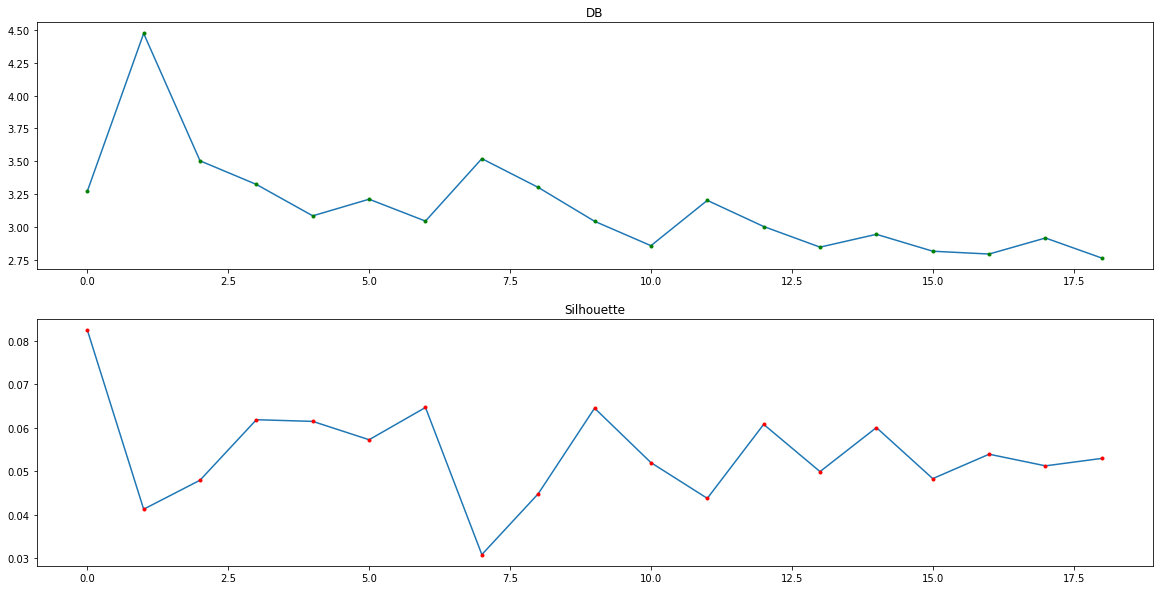

In [77]:
from sklearn.mixture import GaussianMixture
ls = []
ldb = []
for i in range(2,21,1):
    clusterer = mixture.GaussianMixture(n_components=i, covariance_type='full')
    clusterer.fit(dados2)
    labels=clusterer.predict(dados2)
    ldb.append(davies_bouldin_score(dados2, labels))
    ls.append(silhouette_score(dados2, labels))
print(la)

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(ldb)
plt.plot(ldb,'g.')
plt.title("DB")
plt.subplot(2,1,2)
plt.plot(ls)
plt.plot(ls,'r.')
plt.title("Silhouette")
   

O indice de DB resultante da experimentação com essa função foi bastante irrgular se comparado com os demais. Observando o gráfico de saída o mais próximo a uma mudança de concavidade no gráfico foi na transição de 4(6) para 5(7) no gráfico. Já para a silhouette os melhores valores foram com k=2,5,6,9. Portanto o valor escolhido seria em k=6 por estar mais em concordância com ambos os métodos.

### Conclusão
---

Dentre os métodos de clustering utilizados nesta prática, o kmeans foi o que se demonstrou mais promissor com valores maiores para silhouette e o gráfico do cotovelo foi mais conclusivo para se escolher o valor de k mais adequado para o conjunto de dados trabalhado. Em segundo lugar veio o modelo hierárquico com um comportamento parecido com o do kmeans entretanto um valor de silhouette menor, o que pode indicar um agrupamento com menos pertinência dos dados ao grupoo, entretanto o db é maior o que pode ser um bom parãmetro também para a escolha do método.    